#######################################################

#DAY OF DATA 2020 MODIFIABLE AREAL UNIT PROBLEM ACTIVITY
#KRZYZANOWSKI, BRITTANY

########################################################


# Let's look at the rather strong and stable relationship between neighborhood air quality and proportion nonwhite.

Due to structural racism, minority populations are much more likely to live in neighborhoods with high pollution levels than whites.


In [1]:
#Load the Libraries
require(GWmodel)
library(rgdal)
require(tmap)

#Name your data so you can call on it.  We will call it "spdat"
spdat<-readOGR("blockgroup.shp")

Loading required package: GWmodel

Warning message:
"package 'GWmodel' was built under R version 3.6.2"
Loading required package: maptools

Loading required package: sp

Checking rgeos availability: TRUE

Loading required package: robustbase

Warning message:
"package 'robustbase' was built under R version 3.6.2"
Loading required package: Rcpp

Loading required package: spatialreg

Warning message:
"package 'spatialreg' was built under R version 3.6.2"
Loading required package: spData

Warning message:
"package 'spData' was built under R version 3.6.2"
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: Matrix

Registered S3 methods overwritten by 'spatialreg':
  method                   from 
  residuals.stsls          spdep
  deviance.stsls           spdep
  coef.stsls               spdep
  print.stsls              spdep
  summary.stsls    

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\orms0027\Documents\day_of_data\blockgroup.shp", layer: "blockgroup"
with 2134 features
It has 8 fields
Integer64 fields read as strings:  Sum_TOTPOP Sum_MINORI 


# View the data so that you can see the variable names.

In [2]:
names (spdat)

# Avg_MEDHIN = Median Household Income.
# Avg_Avg_NO = Average NO2 (air quality metric). Higher is worse.
# Pedu = Porportion of people with a BA degree or higher.
# Pminori = Porportion of non-white.
# Sum_TOTPOP = total number of people per unit.
# Sum_MINORI = total number of non-white.
# Sum_BA_HIG = total number of people with BA degree or higher.


[1] "GEOID"      "Sum_TOTPOP" "Sum_MINORI" "Avg_MEDHIN" "Sum_BA_HIG"
[6] "Avg_Avg_NO" "Pedu"       "Pminori"

# Regress neighborhood air quality on proportion nonwhite.

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\orms0027\Documents\day_of_data\blockgroup.shp", layer: "blockgroup"
with 2134 features
It has 8 fields
Integer64 fields read as strings:  Sum_TOTPOP Sum_MINORI 



Call:
lm(formula = spdat$Avg_Avg_NO ~ spdat$Pminori, data = spdat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0094 -1.7930 -0.3147  1.7256  7.1019 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.99701    0.08806   79.46   <2e-16 ***
spdat$Pminori  9.71136    0.26559   36.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.348 on 2132 degrees of freedom
Multiple R-squared:  0.3854,	Adjusted R-squared:  0.3851 
F-statistic:  1337 on 1 and 2132 DF,  p-value: < 2.2e-16


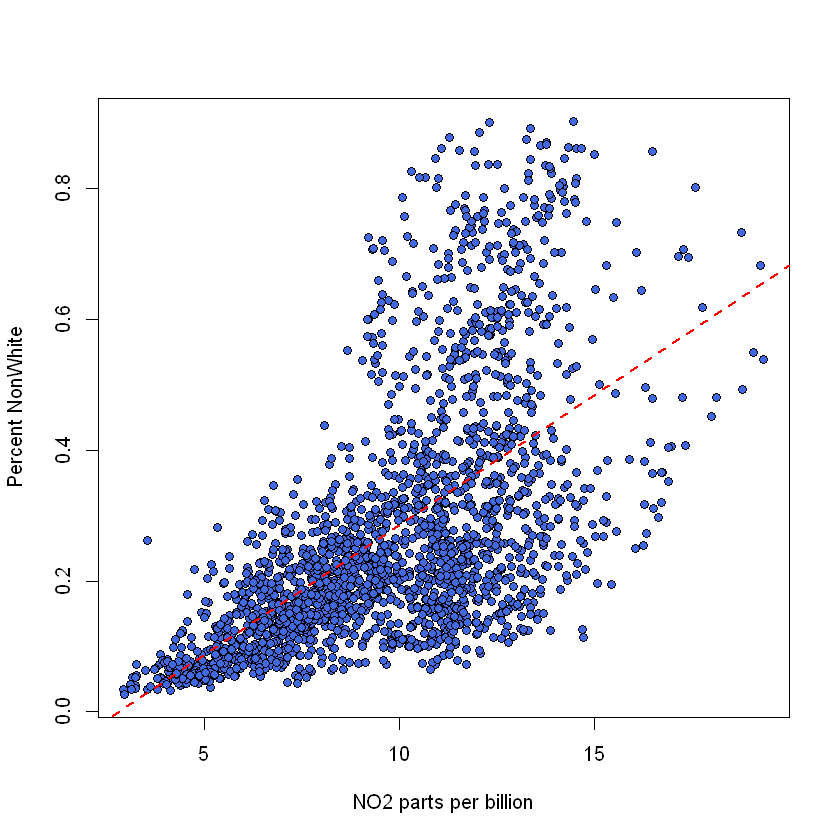

In [8]:
#Read the data
spdat<-readOGR("blockgroup.shp")

#Run the regression
spdat.lm<-lm(spdat$Avg_Avg_NO~spdat$Pminori, data=spdat)
summary.lm(spdat.lm)

#Make a scatterplot of the results with a reg line
plot(spdat$Avg_Avg_NO, spdat$Pminori, ylab = "Percent NonWhite", xlab = "NO2 parts per billion", pch=21, bg="royalblue")
abline(lm(spdat$Pminori~ spdat$Avg_Avg_NO), col="red", lwd=2, lty=2)


# Let's look at a different relationship-one that is not that stable and is vulnerable to MAUP effects. Let's look at the relationship between proportion nonwhite and education. <br>
*Try running this code at the county level first, then schooldistrict, then censustract.*

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\orms0027\Documents\day_of_data\county.shp", layer: "county"
with 16 features
It has 8 fields
Integer64 fields read as strings:  Sum_TOTPOP Sum_MINORI 


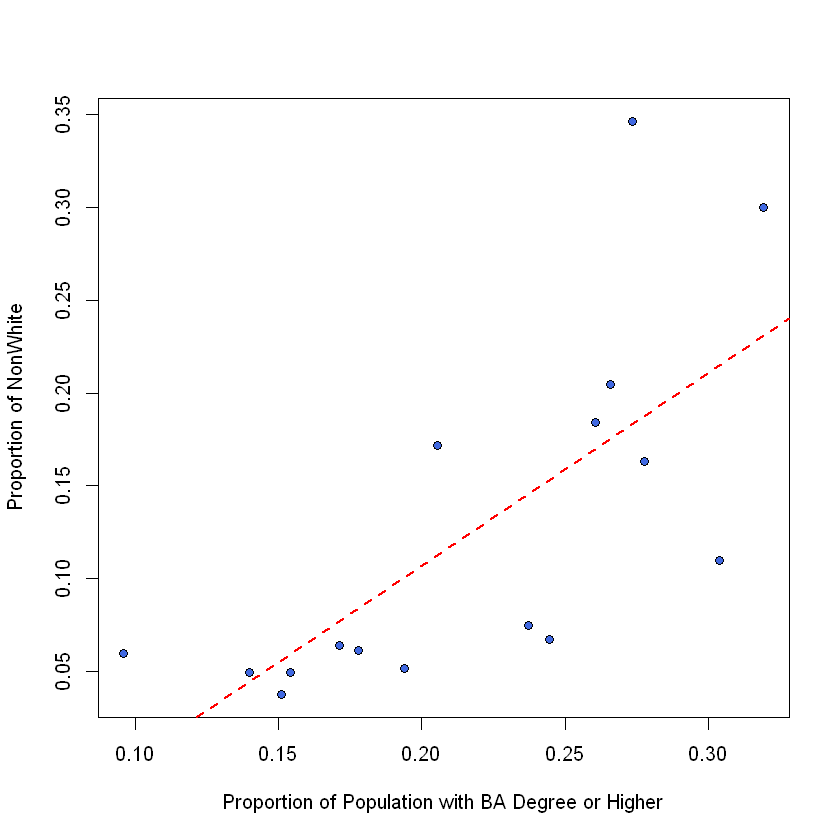

In [5]:
#Read the data
spdat<-readOGR("county.shp")

#Regressing Proportion Minority on proportion with BA degree or higher
spdat.lm<-lm(spdat$Pedu~spdat$Pminori, data=spdat)

#Scatter Plot
plot(spdat$Pedu, spdat$Pminori, ylab = "Proportion of NonWhite", xlab = "Proportion of Population with BA Degree or Higher", pch=21, bg="royalblue")
abline(lm(spdat$Pminori~ spdat$Pedu), col="red", lwd=2, lty=2)

In [6]:
summary.lm(spdat.lm)


Call:
lm(formula = spdat$Pedu ~ spdat$Pminori, data = spdat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.089436 -0.028473  0.000844  0.023415  0.094121 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.15622    0.02001   7.806 1.82e-06 ***
spdat$Pminori  0.48739    0.12914   3.774  0.00205 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04749 on 14 degrees of freedom
Multiple R-squared:  0.5043,	Adjusted R-squared:  0.4689 
F-statistic: 14.24 on 1 and 14 DF,  p-value: 0.002053


* Both Zoning and Aggregation Effects make up the MAUP.
* When you have more observations (aggregation effect) you get different results from when you only have a dozen or so observations. You likely get a better idea of what's going on when you have more observations, but your unit estimates will become less reliable if you use too small of a unit.
* Some map units may have very similar numbers of units but they cut the data differently (zoning effect) and this can also change the relationship that you find. Consider gerrymandering.


# Beginner

Go back through the code above and explore the other relationships within the data. There are 4 main variables (race, income, education, and air quality). There are 5 different mapping units (blockgroup, censustract,schooldistrict,votingdistrict, county). What relationships are relatively stable in the Minneapolis metro area? What relationships are not? Think about the implications.


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\orms0027\Documents\day_of_data\county.shp", layer: "county"
with 16 features
It has 8 fields
Integer64 fields read as strings:  Sum_TOTPOP Sum_MINORI 



Call:
lm(formula = yvar ~ xvar, data = spdat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.089436 -0.028473  0.000844  0.023415  0.094121 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.15622    0.02001   7.806 1.82e-06 ***
xvar         0.48739    0.12914   3.774  0.00205 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04749 on 14 degrees of freedom
Multiple R-squared:  0.5043,	Adjusted R-squared:  0.4689 
F-statistic: 14.24 on 1 and 14 DF,  p-value: 0.002053


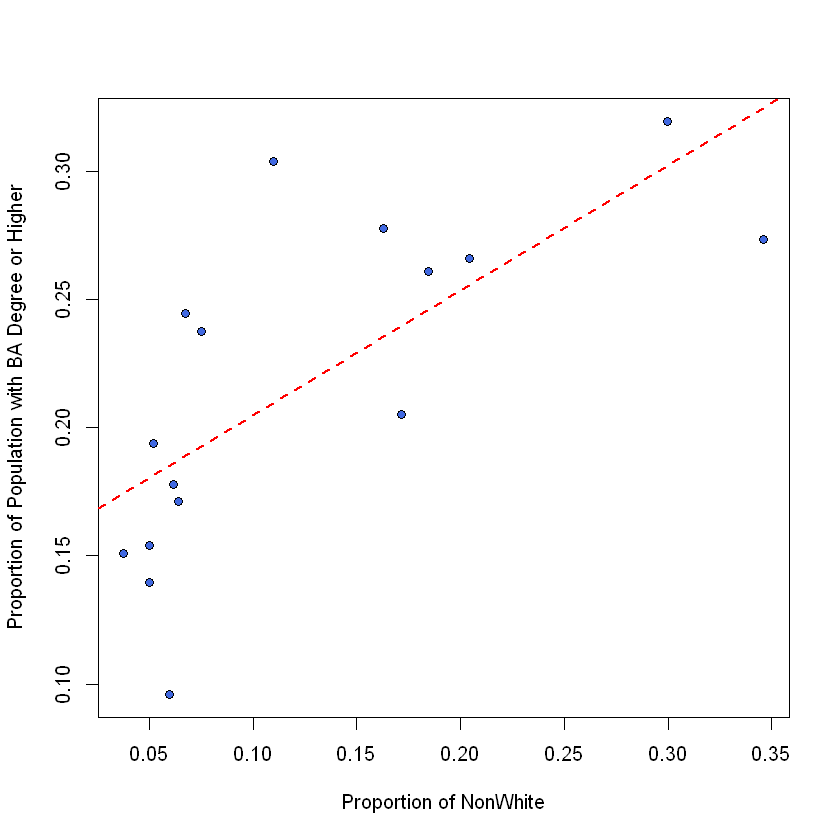

In [17]:
#Read the data (you can change this to explore other map units)
spdat<-readOGR("county.shp")

# set up variables and labels 
# (these are the only other things you need to change, go back to cell 2 to find the variable names)
xvariable = spdat$Pminori
xlabel = "Proportion of NonWhite"
yvariable = spdat$Pedu
ylabel = "Proportion of Population with BA Degree or Higher"

#create regression model (don't change this)
spdat.lm<-lm(yvar~xvar, data=spdat)

#Scatter Plot (don't change this)
plot(xvariable, yvariable, ylab = ylabel, xlab = xlabel, pch=21, bg="royalblue")
abline(spdat.lm, col="red", lwd=2, lty=2)

# print summary of regression (don't change this)
summary.lm(spdat.lm)

# Intermediate

Go back and explore the data (4 different main variables and 5 different mapping units). Can you use R to make maps? Create four maps: proportion minority (for census tracts and school districts) and air quality (for census tracts and school districts). Now do the same for proportion minority and education. Can you change the color schema of the maps? Maybe add a title and scalebar? Google is your friend.


Loading required package: tmap

Warning message:
"readShapeSpatial is deprecated; use rgdal::readOGR or sf::st_read"
Warning message:
"readShapePoly is deprecated; use rgdal::readOGR or sf::st_read"
Warning message:
"The shape spdat is invalid. See sf::st_is_valid"
Warning message:
"Currect projection of shape spdat unknown. Long-lat (WGS84) is assumed."


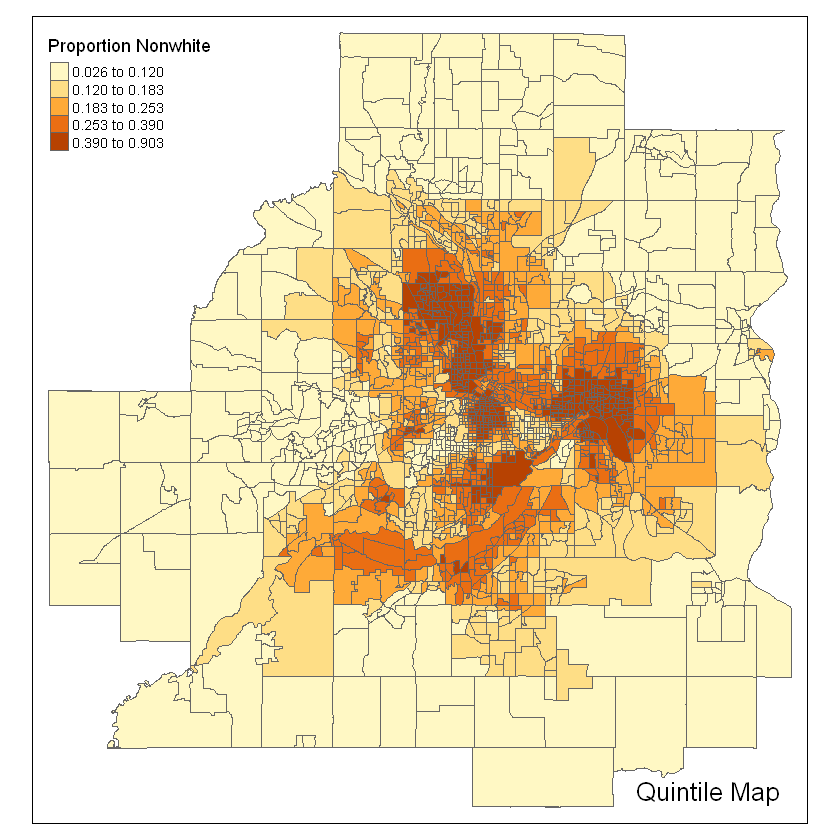

In [16]:
spdat<-readOGR("blockgroup.shp")

tm_shape(spdat) +
  tm_fill("Pminori",title="Proportion Nonwhite",style="quantile")  +
  tm_borders() +
  tm_layout(title = "Quintile Map", title.position = c("right","bottom"))


# Expert

Can you check for MAUP effects in your own data? If you aren't able to access your own data right now, go online and download a dataset that you are interested in.

